In [11]:
%matplotlib inline
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
from employeeNet import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

# Base Employees Net

In [12]:
def buildNamedBusinessGraph(data):
    G = nx.Graph()
    names = data.keys()
    for k,i in enumerate(names): G.add_node(i)
        
    for name1 in names:
        for name2 in names:
            if name1 != name2 and len(list(set(data[name1]) & set(data[name2]))):
                G.add_edge(name1,name2)
    
    labels={}
    for k,i in enumerate(names): labels[i] = i
    return G, labels

def buildBusinessGraph(data):
    G = nx.Graph()
    names = data.keys()
    businesses = list(Counter([item for sublist in data.values() for item in sublist]).keys())
    
    businessMembers = defaultdict(list)
    for b in businesses:
        for name in names:
            if b in data[name]:
                businessMembers[b].append(name)
            
    businessList = businessMembers.keys()
    for k,i in enumerate(businessList): G.add_node(i)
    for b1 in businessList:
        for b2 in businessList:
            if b1 != b2 and len(list(set(businessMembers[b1]) & set(businessMembers[b2]))):
                G.add_edge(b1,b2)
    
    labels={}
    for k,i in enumerate(businessList): labels[i] = i
    return G, labels

def plotGraph(G,labels,colors=None):
    pos=nx.spring_layout(G,k=1)
    nx.draw(G,pos,node_color=colors)
    for label in pos:
        x,y = pos[label]
        plt.text(x,y+0.035,s=labels[label],horizontalalignment='center',fontsize=24)

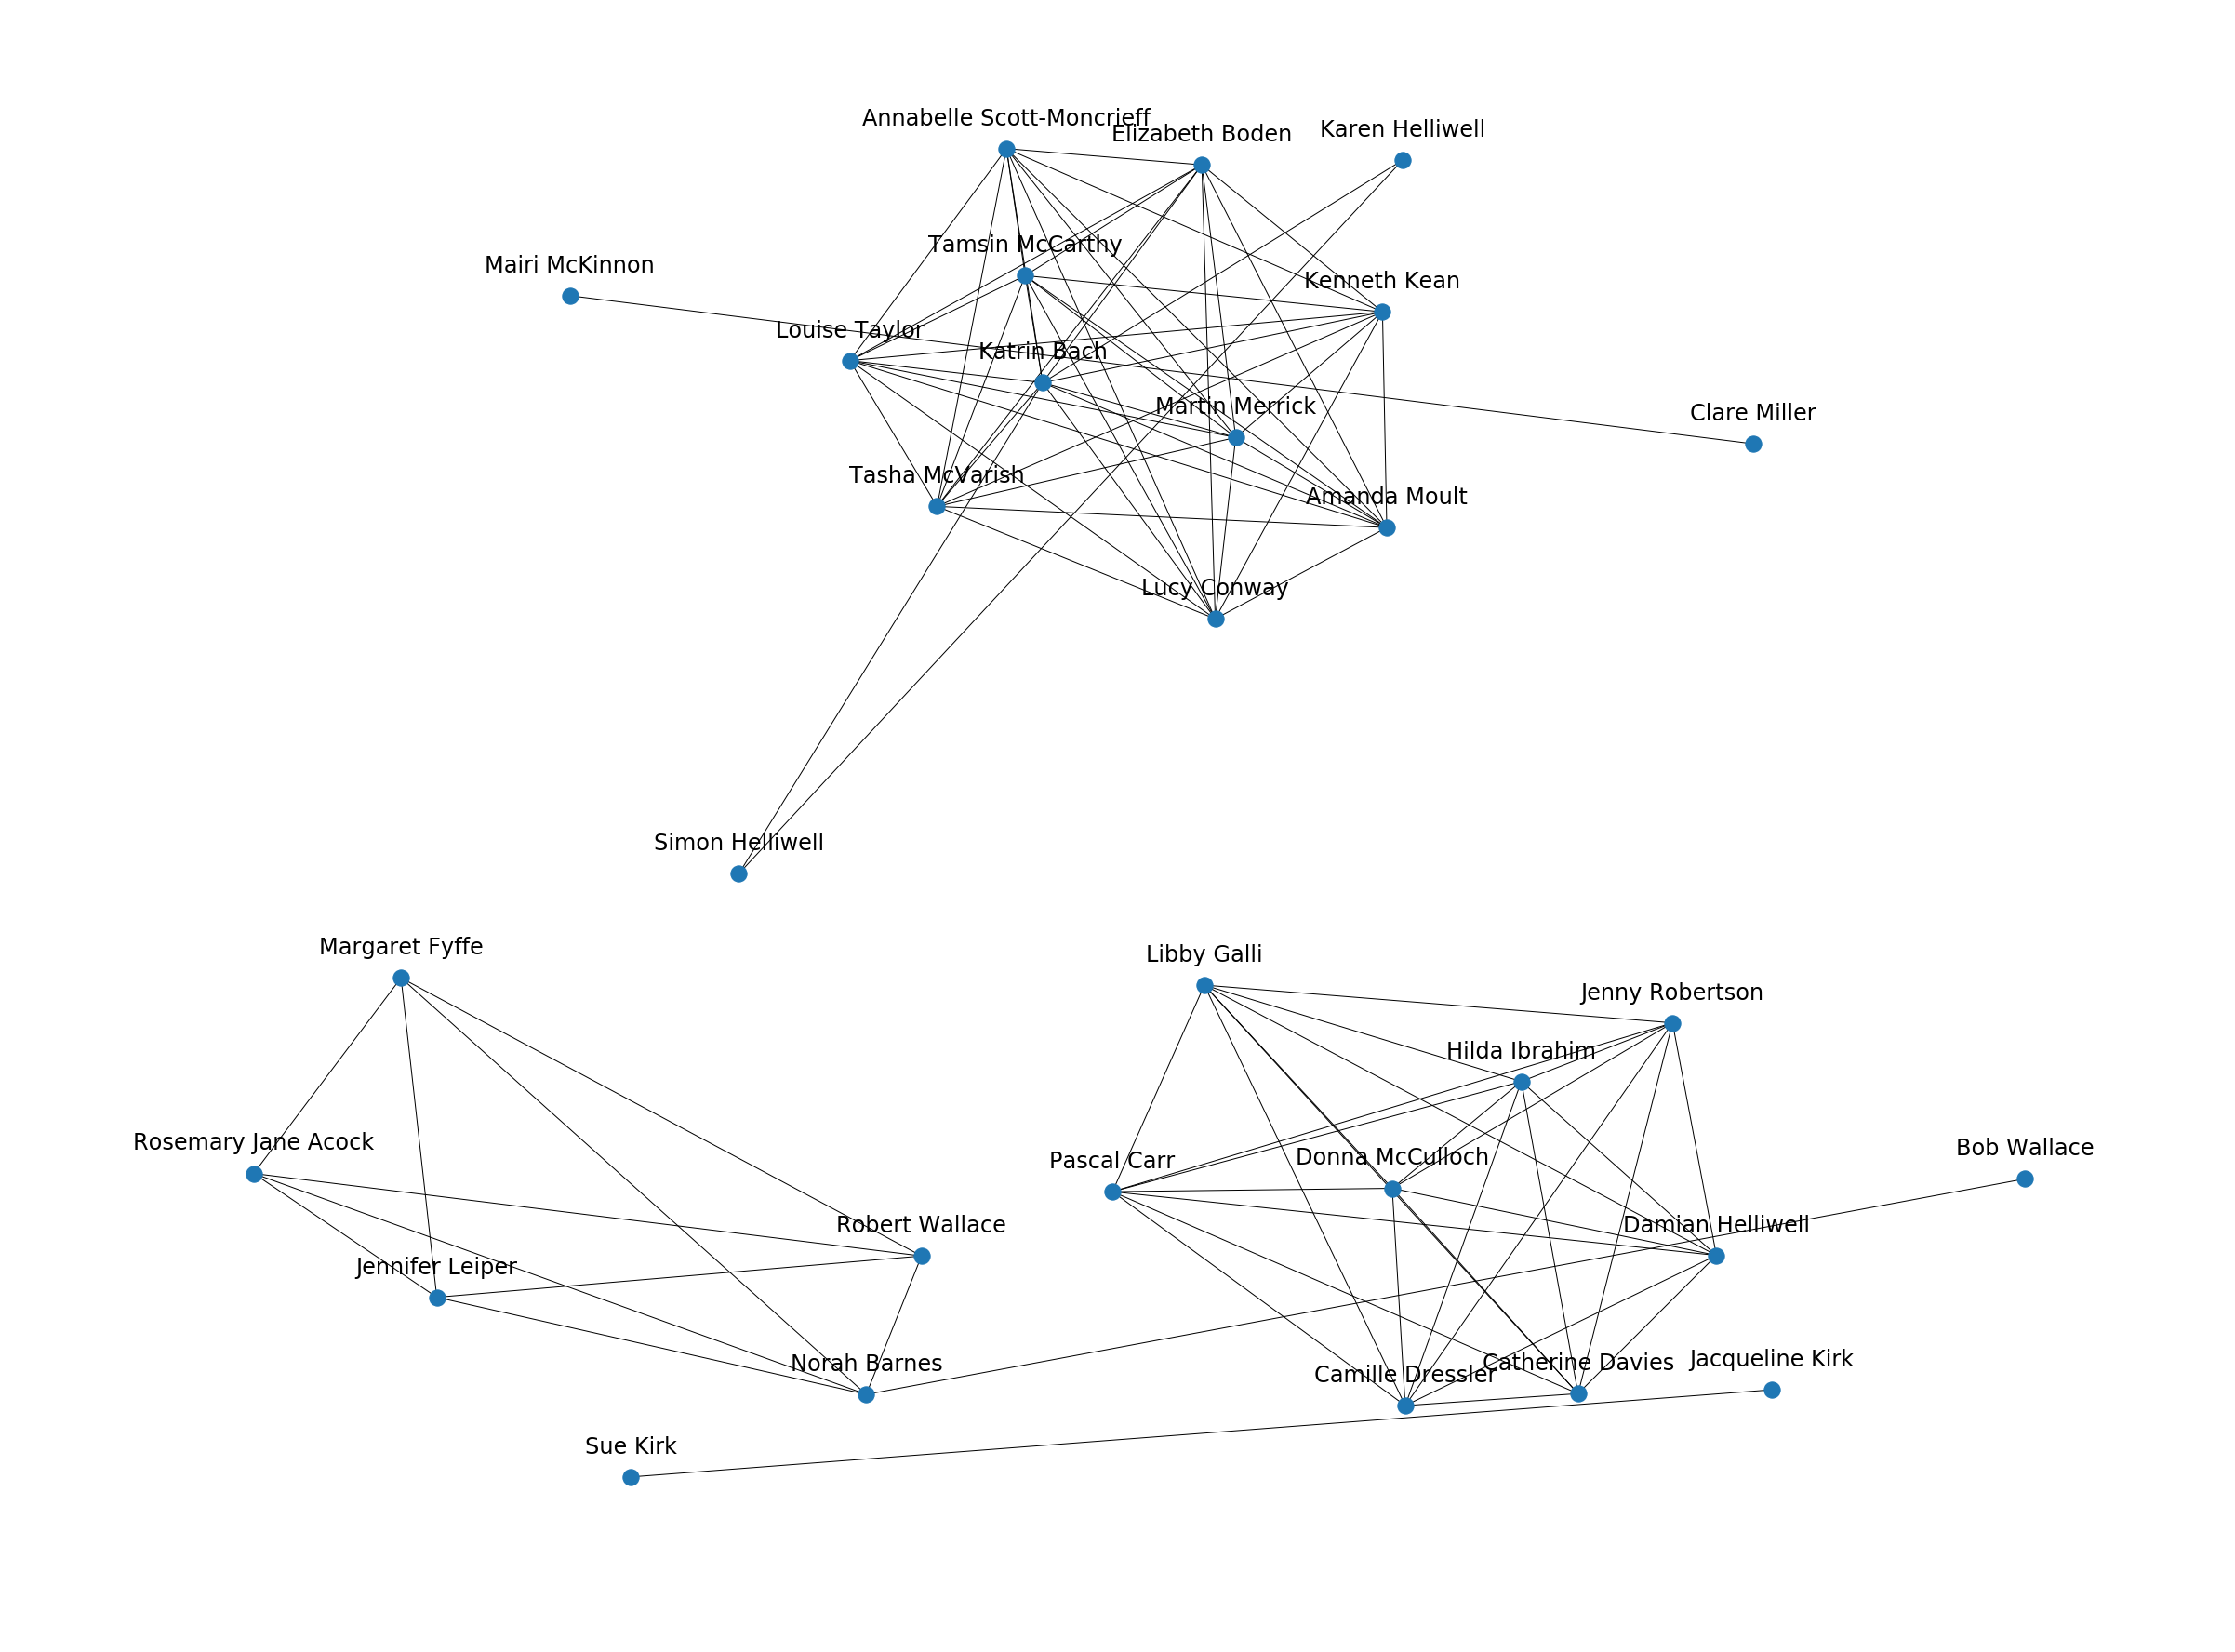

In [13]:
data = employeeGraph()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

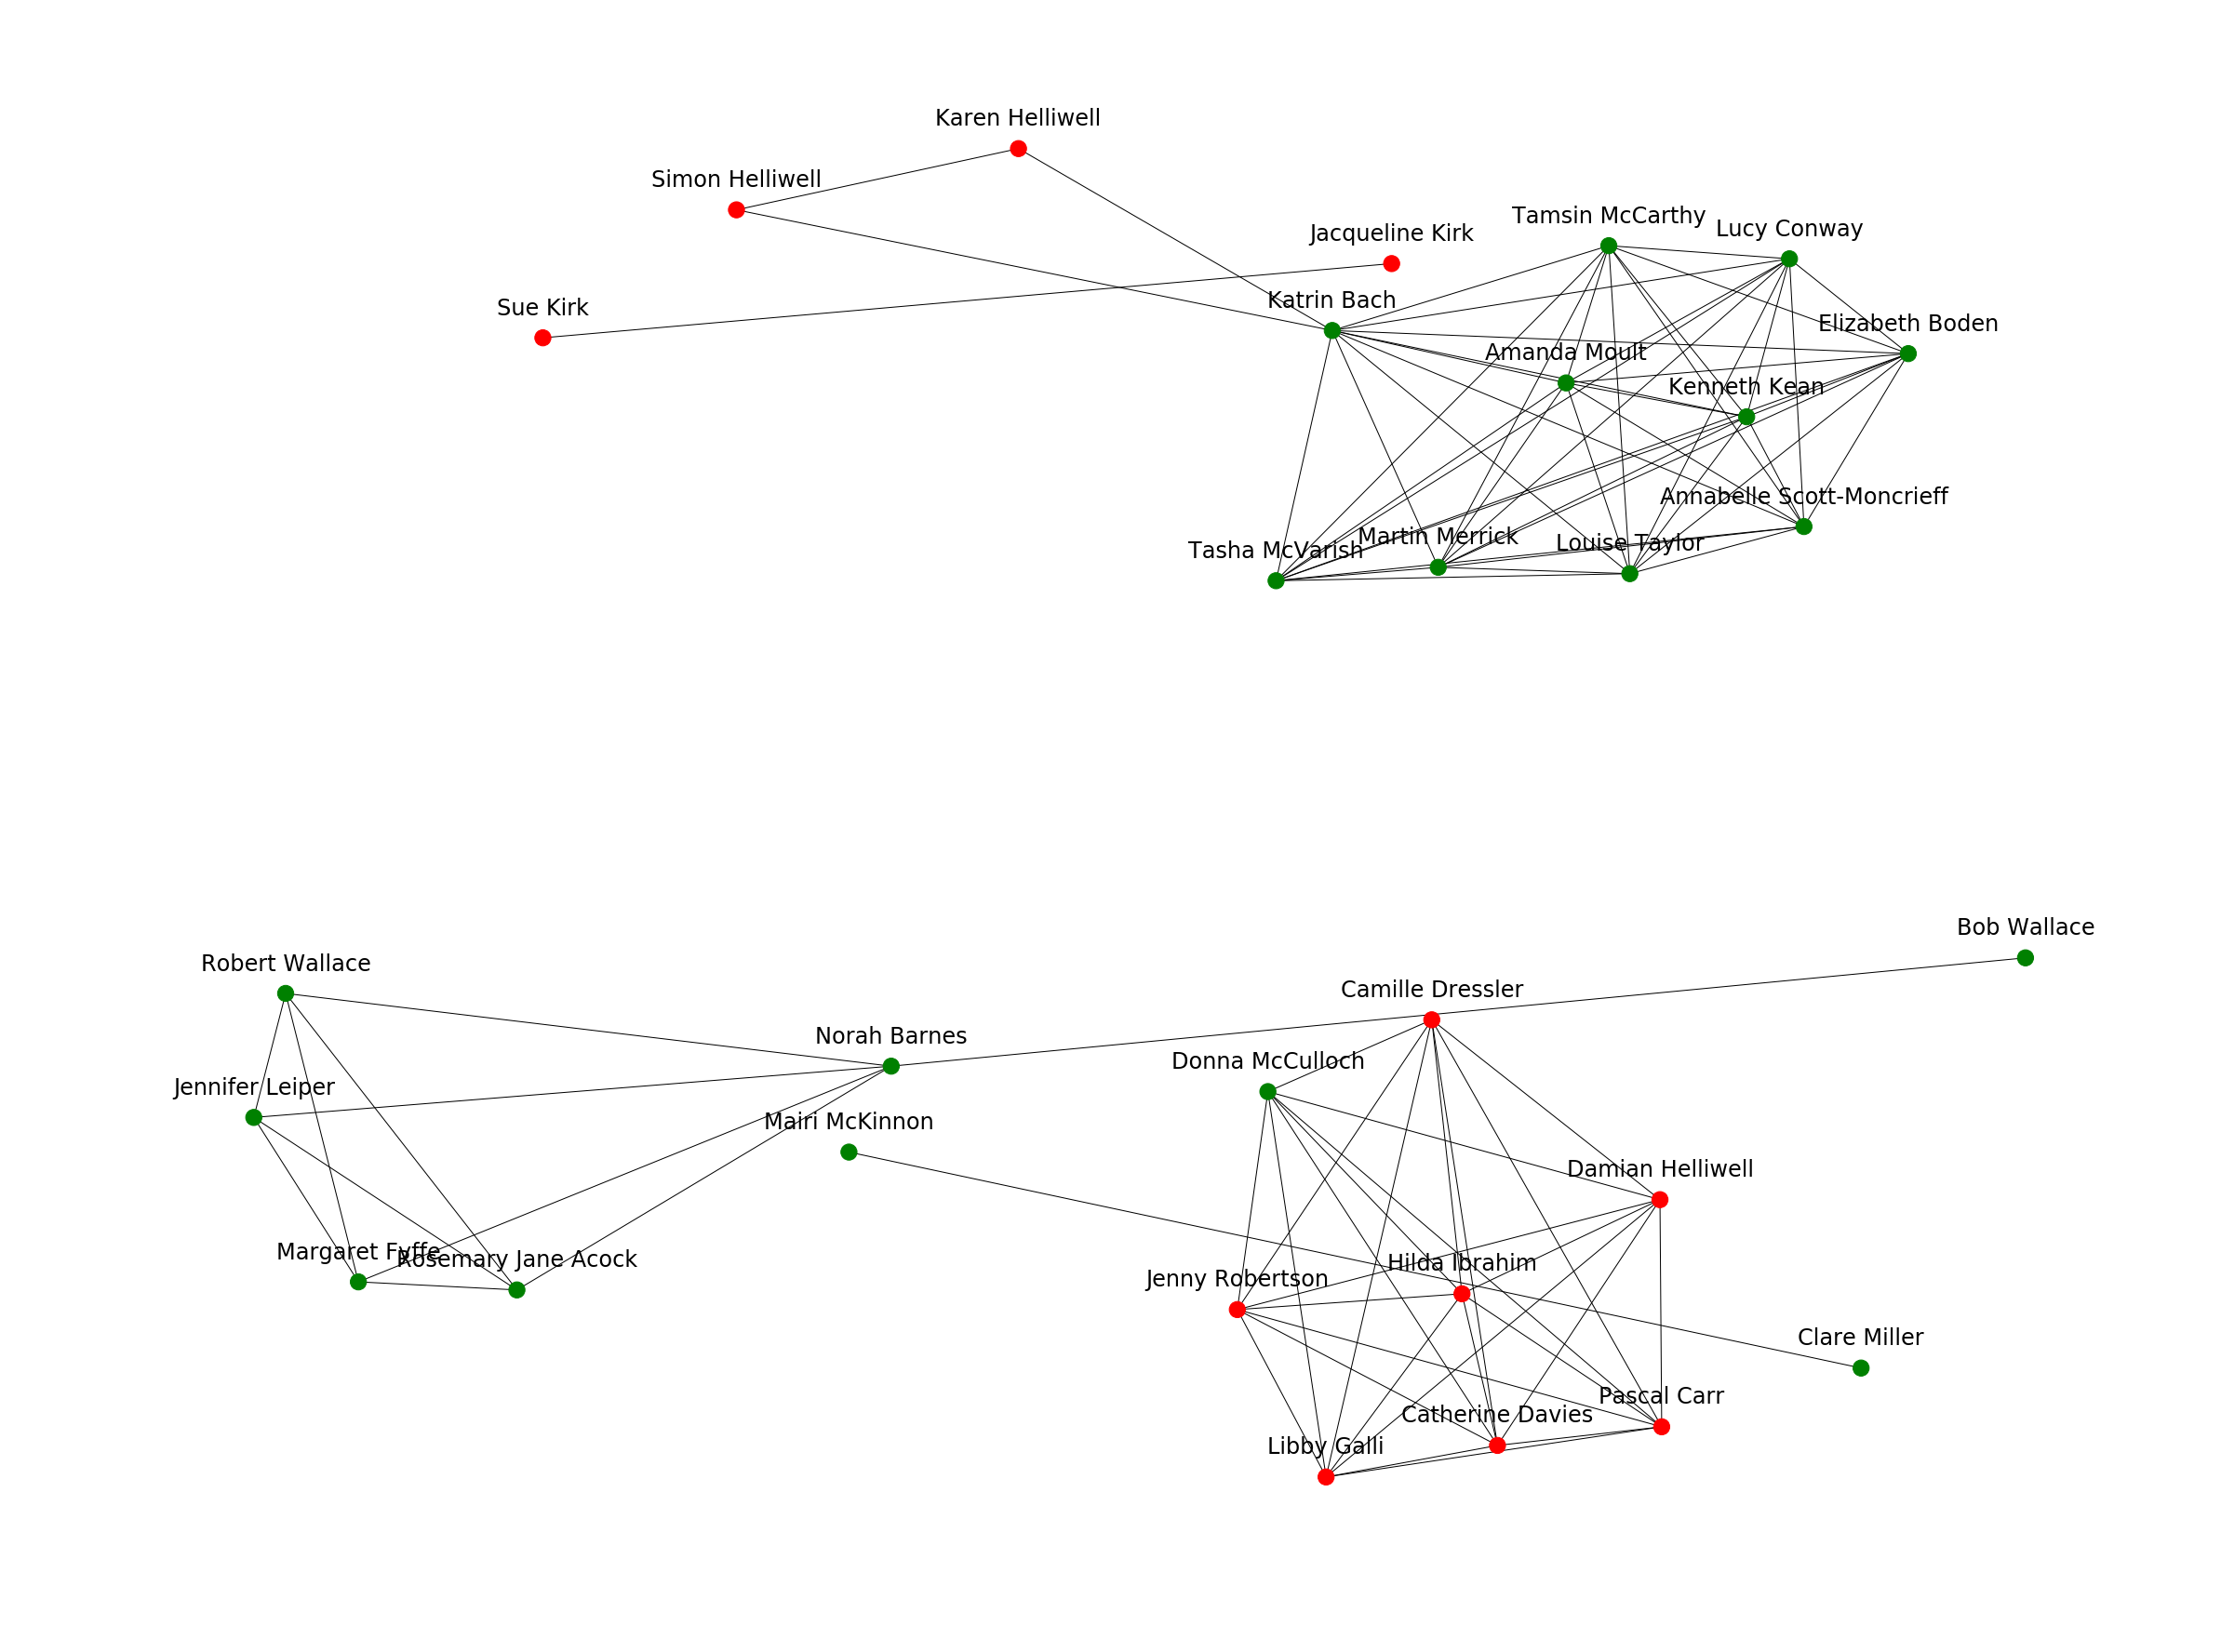

In [16]:
publicEmployees = involvedInPublicServices()
data = employeeGraph()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
colors = ["red" if publicEmployees[x] == 0 else "green" for x in G.nodes()]
plotGraph(G,labels,colors)

# Public nets

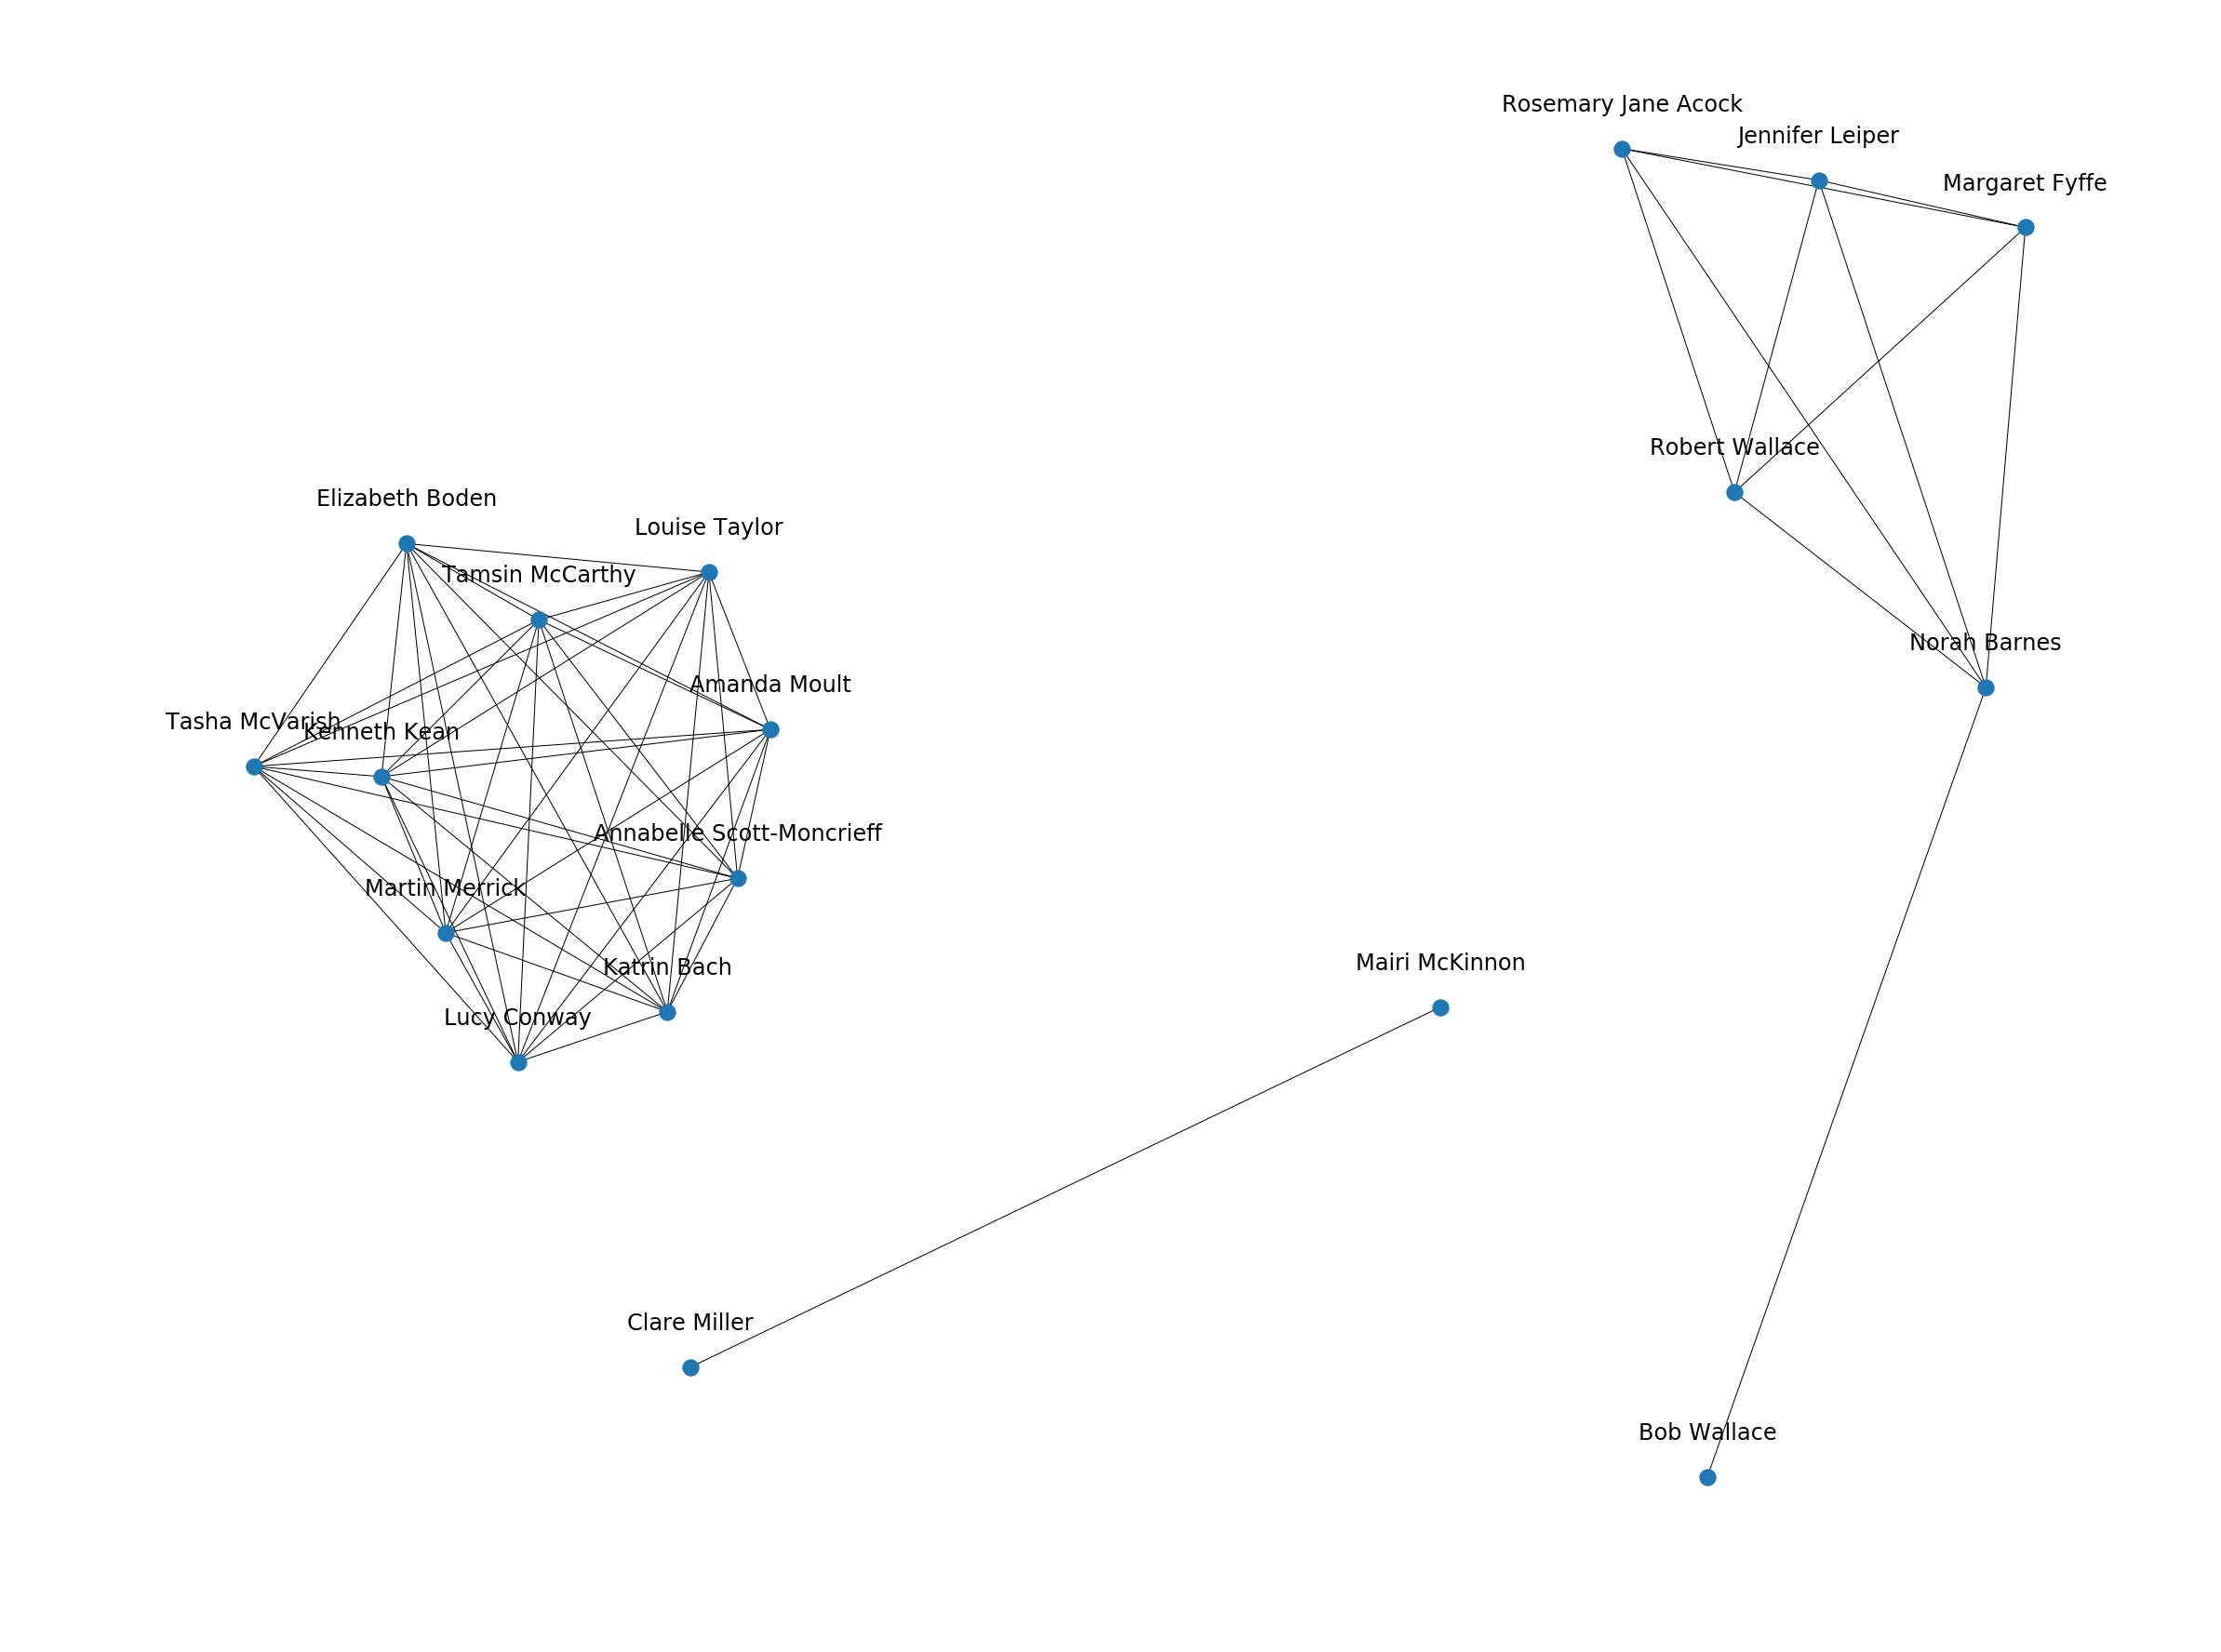

In [15]:
data = publicEmployeeNetwork()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

# Private Employees Networks

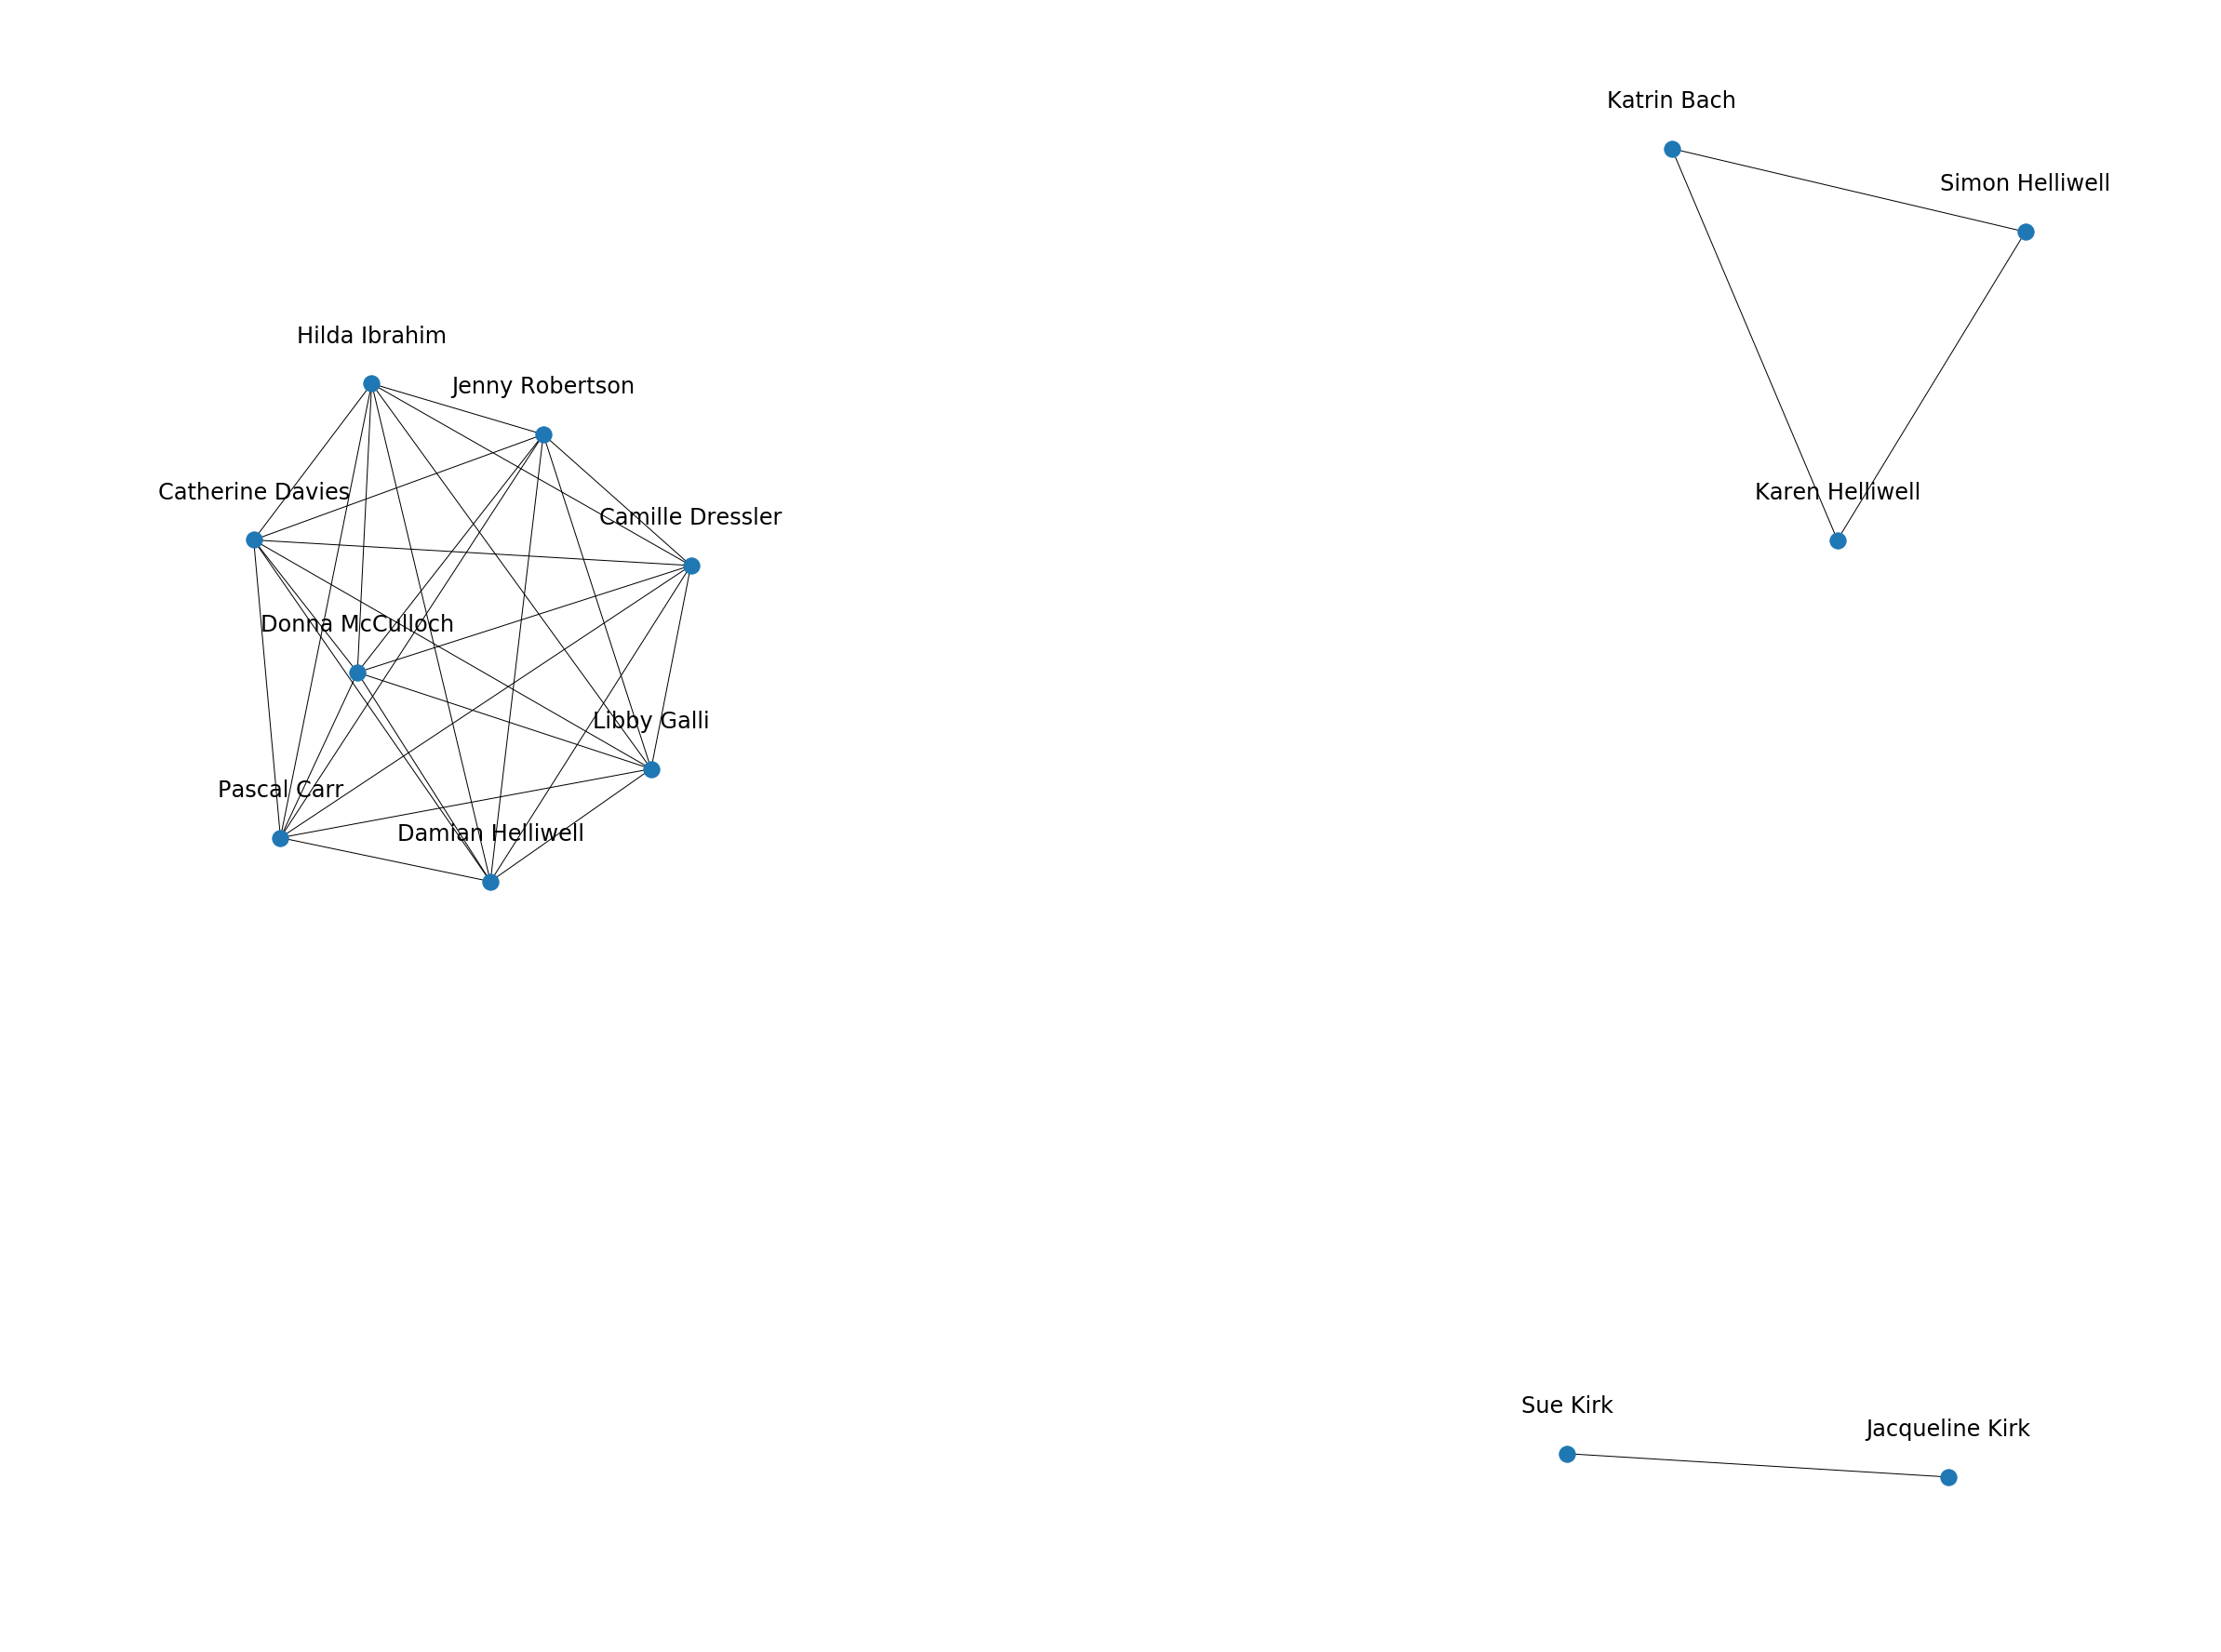

In [17]:
data = privateEmployeeNetwork()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)